In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
Iris = pd.read_csv('11_Iris.csv')
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
114,115,5.8,2.8,5.1,2.4,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
29,30,4.7,3.2,1.6,0.2,Iris-setosa


## Data Pre-processing

Changing id column to index

In [4]:
Iris = pd.read_csv('11_Iris.csv',index_col=0)
Iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
139,6.0,3.0,4.8,1.8,Iris-virginica
55,6.5,2.8,4.6,1.5,Iris-versicolor
35,4.9,3.1,1.5,0.1,Iris-setosa
133,6.4,2.8,5.6,2.2,Iris-virginica
67,5.6,3.0,4.5,1.5,Iris-versicolor
111,6.5,3.2,5.1,2.0,Iris-virginica
140,6.9,3.1,5.4,2.1,Iris-virginica
5,5.0,3.6,1.4,0.2,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
Iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
print(Iris.apply(pd.Series.value_counts).iloc[0:50,:])
print(Iris.apply(pd.Series.value_counts).iloc[50:100,:])
print(Iris.apply(pd.Series.value_counts).iloc[100:151,:])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0.1            NaN           NaN            NaN           6.0      NaN
0.2            NaN           NaN            NaN          28.0      NaN
0.3            NaN           NaN            NaN           7.0      NaN
0.4            NaN           NaN            NaN           7.0      NaN
0.5            NaN           NaN            NaN           1.0      NaN
0.6            NaN           NaN            NaN           1.0      NaN
1.0            NaN           NaN            1.0           7.0      NaN
1.1            NaN           NaN            1.0           3.0      NaN
1.2            NaN           NaN            2.0           5.0      NaN
1.3            NaN           NaN            7.0          13.0      NaN
1.4            NaN           NaN           12.0           8.0      NaN
1.5            NaN           NaN           14.0          12.0      NaN
1.6            NaN           NaN            7.0           4.0      NaN
1.7   

No null values are found in any of the columns

In addition to no null values ,no special characters which can serve as missing values are found in any of the rows or columns.

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [8]:
Iris['Species']=preprocessing.LabelEncoder().fit_transform(Iris['Species'])
Iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
53,6.9,3.1,4.9,1.5,1
82,5.5,2.4,3.7,1.0,1
110,7.2,3.6,6.1,2.5,2
90,5.5,2.5,4.0,1.3,1
126,7.2,3.2,6.0,1.8,2
36,5.0,3.2,1.2,0.2,0
18,5.1,3.5,1.4,0.3,0
145,6.7,3.3,5.7,2.5,2
107,4.9,2.5,4.5,1.7,2


Species are encoded to values 0 ,1 and 2.

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [9]:
Iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


None of the correlation between target and feature variable fall between the range of -.1 to .1 .Therefore no feature is required drop or remove treatment.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [10]:
Iris.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64

None of the independent features or variables have variance under the value of 0.1 and are not required drop or remove action.

## Question 6

*Plot the scatter matrix for all the variables.*

In [11]:
Iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


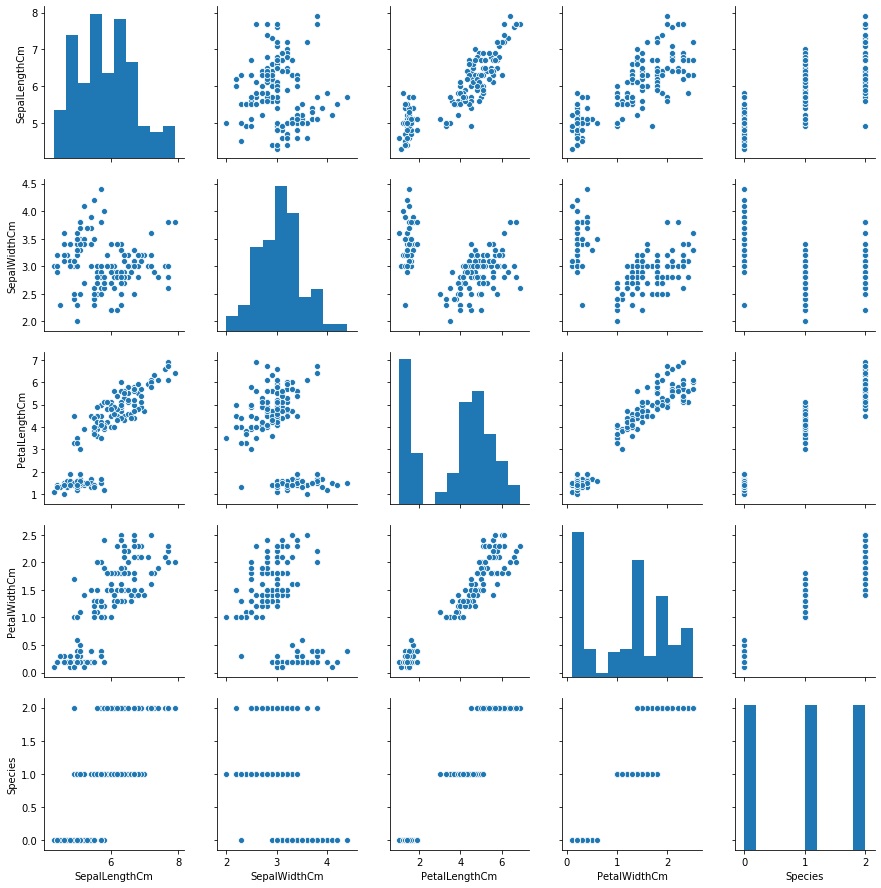

In [12]:
sns.pairplot(Iris)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [13]:
X = Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = Iris['Species']

In [14]:
X.sample(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
136,7.7,3.0,6.1,2.3
150,5.9,3.0,5.1,1.8


In [15]:
Y.sample(4)

Id
13    0
60    1
85    1
74    1
Name: Species, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
print('Ans:')
print('(a):Size of Iris in terms of rows,col before splitting =',Iris.shape)
print('(f):Train Test samples Shapes in terms of rows, columns after splitting = ','Xtrain=',X_train.shape,'Xtest =',X_test.shape,'Ytrain=',Y_train.shape,'Ytest=',Y_test.shape)
print('(g):Data set Train/Test split ratio = sample train /sample test=',len(X_train)/len(X_test),'= 4/1 = 80:20')

Ans:
(a):Size of Iris in terms of rows,col before splitting = (150, 5)
(f):Train Test samples Shapes in terms of rows, columns after splitting =  Xtrain= (120, 4) Xtest = (30, 4) Ytrain= (120,) Ytest= (30,)
(g):Data set Train/Test split ratio = sample train /sample test= 4.0 = 4/1 = 80:20


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
print('the testing accuracy of model at k=3 is',accuracy_score(knn.predict(X_test),Y_test))
print('the training accuracy of model at k=3 is',accuracy_score(knn.predict(X_train),Y_train))

the testing accuracy of model at k=3 is 0.9666666666666667
the training accuracy of model at k=3 is 0.95


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print('the testing accuracy of model at k=3 is',accuracy_score(knn.predict(X_test),Y_test))
print('the training accuracy of model at k=3 is',accuracy_score(knn.predict(X_train),Y_train))

the testing accuracy of model at k=3 is 0.9666666666666667
the training accuracy of model at k=3 is 0.95


In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
print('the testing accuracy of model at k=3 is',accuracy_score(knn.predict(X_test),Y_test))
print('the training accuracy of model at k=3 is',accuracy_score(knn.predict(X_train),Y_train))

the testing accuracy of model at k=3 is 1.0
the training accuracy of model at k=3 is 0.9583333333333334


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [22]:
scoretrain=[]

In [23]:
scoretest=[]

In [24]:
for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scoretest.append(accuracy_score(knn.predict(X_test),Y_test))
    scoretrain.append(accuracy_score(knn.predict(X_train),Y_train))
print('Testing accuracy of model for various values of k are =',scoretest)
print('&')
print('Training accuracy of model for various values of k are =',scoretrain)

Testing accuracy of model for various values of k are = [1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
&
Training accuracy of model for various values of k are = [1.0, 0.95, 0.95, 0.9666666666666667, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.95]


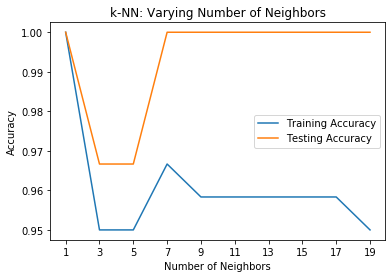

In [25]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,20,2), scoretrain, label = 'Training Accuracy')
plt.plot(range(1,20,2),scoretest, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 2)) 
plt.show()

As considering only 1 neigbour is not suffice, we ignore the value for k=1.So for different K values ranging from 1 to 19 ,the optimal value of K for testing accuracies is found to be at K=7

As considering only 1 neigbour is not suffice, we ignore the value for k=1.For different K values ranging from 1 to 19 ,the optimal value of K for training accuracies is found to be at K =7 too

# Finding optimal value of K using MSE without cross validation of n folds.

In [26]:
mse = [1 - x for x in scoretest]
mse

[0.0,
 0.033333333333333326,
 0.033333333333333326,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

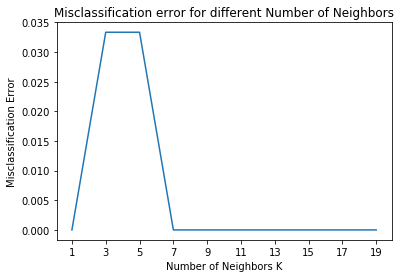

In [27]:
plt.title('Misclassification error for different Number of Neighbors')
plt.plot(range(1,20,2), mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.xticks(np.arange(1, 21, 2)) 
plt.show()

Misclassification error plot shows that K=7 results in the lowest validation error of 0 percent which will be as same as our optimal K values for highest test accuracy at 100 percent. 100 percent accuracy = 0 percent MSE, so we just drawn a graph in terms of error rather than accuracy,no cross validation is done here. These accuracies seem to be the case of overfitting.

# Finding optimal value MSE with cross validation of n folds

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
CVSCORES=[]

In [30]:
for k in range(1,20,2):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train, Y_train, cv=4, scoring='accuracy')
    CVSCORES.append(scores.mean())
print(CVSCORES)

[0.9499629217649239, 0.9330088987764182, 0.9580274378939563, 0.9663607712272896, 0.9663607712272896, 0.9663607712272896, 0.9663607712272896, 0.9577400815721172, 0.9494067482387839, 0.9494067482387839]


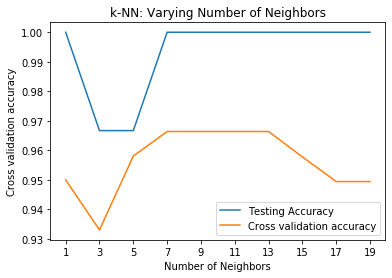

In [31]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,20,2), scoretest, label = 'Testing Accuracy')
plt.plot(range(1,20,2),CVSCORES, label = 'Cross validation accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross validation accuracy')
plt.xticks(np.arange(1, 21, 2)) 
plt.show()

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [32]:
msecv = [1 - x for x in CVSCORES]
msecv

[0.05003707823507608,
 0.06699110122358176,
 0.04197256210604372,
 0.03363922877271042,
 0.03363922877271042,
 0.03363922877271042,
 0.03363922877271042,
 0.04225991842788279,
 0.050593251761216096,
 0.050593251761216096]

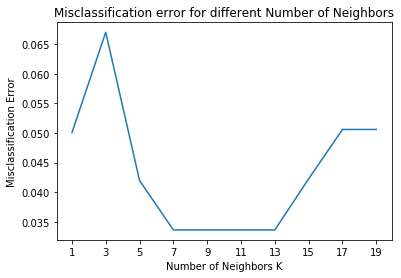

In [33]:
plt.title('Misclassification error for different Number of Neighbors')
plt.plot(range(1,20,2), msecv)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.xticks(np.arange(1, 21, 2)) 
plt.show()

In [34]:
optimalKtestcv = range(1,20,2)[msecv.index(min(msecv))]
print(optimalKtestcv)

7


4-fold cross validation tells us that K=7 results in the lowest validation error.

# Naive Bayes with Iris Data

In [35]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

importing iris data set

In [36]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
64,5.6,2.9,3.6,1.3,versicolor
121,5.6,2.8,4.9,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
148,6.2,3.4,5.4,2.3,virginica
5,5.4,3.9,1.7,0.4,setosa


checking for any null,special character or any othet type of missing values. 

In [37]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No null values are found in imported iris data

In [38]:
print(iris.apply(pd.Series.value_counts).iloc[0:50,:])
print(iris.apply(pd.Series.value_counts).iloc[50:100,:])
print(iris.apply(pd.Series.value_counts).iloc[100:151,:])

     sepal_length  sepal_width  petal_length  petal_width  species
0.1           NaN          NaN           NaN          5.0      NaN
0.2           NaN          NaN           NaN         29.0      NaN
0.3           NaN          NaN           NaN          7.0      NaN
0.4           NaN          NaN           NaN          7.0      NaN
0.5           NaN          NaN           NaN          1.0      NaN
0.6           NaN          NaN           NaN          1.0      NaN
1.0           NaN          NaN           1.0          7.0      NaN
1.1           NaN          NaN           1.0          3.0      NaN
1.2           NaN          NaN           2.0          5.0      NaN
1.3           NaN          NaN           7.0         13.0      NaN
1.4           NaN          NaN          13.0          8.0      NaN
1.5           NaN          NaN          13.0         12.0      NaN
1.6           NaN          NaN           7.0          4.0      NaN
1.7           NaN          NaN           4.0          2.0     

no special characters or any other kind of missing values are found in any of the rows and columns of imported iris data set

# Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [39]:
Xnb=iris.iloc[:,0:4]
Xnb.sample(2)

,sepal_length,sepal_width,petal_length,petal_width
32,5.2,4.1,1.5,0.1
10,5.4,3.7,1.5,0.2


In [40]:
Ynb=iris['species']
Ynb.sample(3)

56     versicolor
142     virginica
112     virginica
Name: species, dtype: object

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [41]:
iris.groupby(["species"]).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


Text(0, 0.5, 'Count')

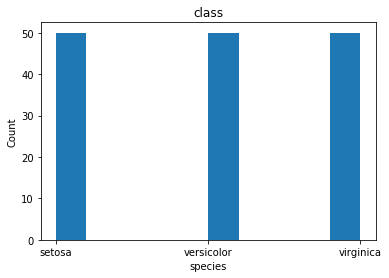

In [42]:
plt.hist(iris['species'])
plt.title("class") 
plt.xlabel("species") 
plt.ylabel("Count") 

#Drop Id variable from data

ID is already being used as index column so removal is not required

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF7600BCC8>,
      dtype=object)

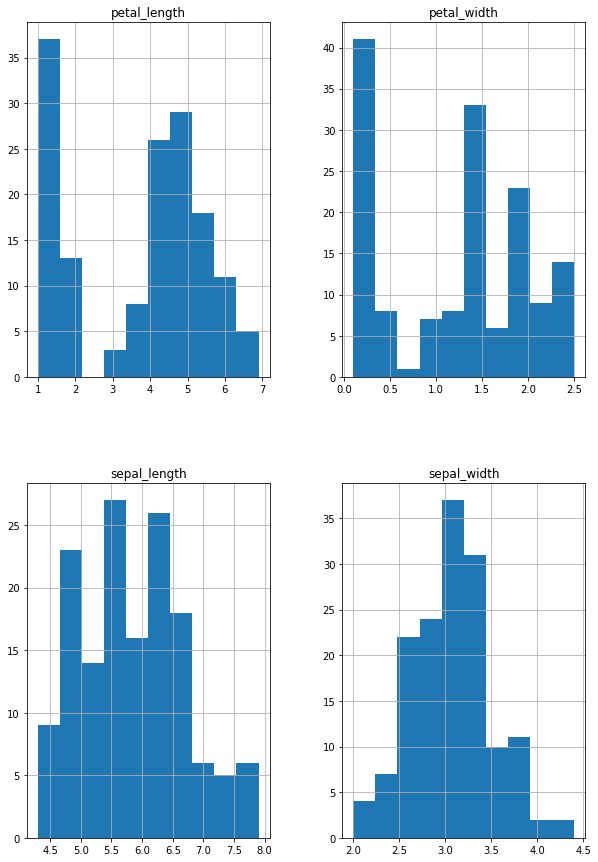

In [43]:
iris.hist(figsize =(10,15))

At first sight, Petal length and petal width seem to diverge from the normal distribution.

### Question 12 
Find Correlation among all variables and give your insights 

In [44]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


1 is total positive linear correlation
0 is no linear correlation
−1 is total negative linear correlation

a high positive correlation between PetalWidth and PetalLength (0.96) is observed

a high positive correlation between PetalLength and SepalLength (0.87) is observed

a high positive correlation between PetalWidth and SepalLength (0.81) is observed

[]

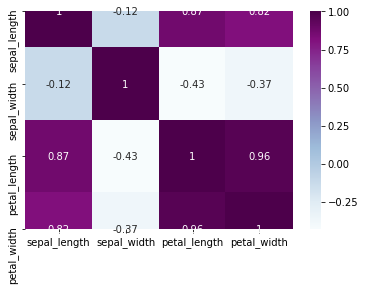

In [45]:
sns.heatmap(iris.corr(),annot=True,cmap='BuPu')
plt.plot()

### Split data in Training and test set in 80:20.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
Xnb_train,Xnb_test,Ynb_train,Ynb_test = train_test_split(Xnb,Ynb,test_size = 0.2,random_state=4)
print('Ans:')
print('(a):Size of Iris in terms of rows,col before splitting =',Iris.shape)
print('(f):Train Test samples Shapes in terms of rows, columns after splitting = ','Xnbtrain=',Xnb_train.shape,'Xnbtest =',Xnb_test.shape,'Ynbtrain=',Ynb_train.shape,'Ynbtest=',Ynb_test.shape)
print('(g):Data set Train/Test split ratio = sample train /sample test=',len(Xnb_train)/len(Xnb_test),'= 4/1 = 80:20')

Ans:
(a):Size of Iris in terms of rows,col before splitting = (150, 5)
(f):Train Test samples Shapes in terms of rows, columns after splitting =  Xnbtrain= (120, 4) Xnbtest = (30, 4) Ynbtrain= (120,) Ynbtest= (30,)
(g):Data set Train/Test split ratio = sample train /sample test= 4.0 = 4/1 = 80:20


### Question 13 
Do Feature Scaling 

 Use StandardScaler or similar methods

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [49]:
sc.fit(Xnb_train)
scaledXnb_train = sc.transform(Xnb_train)
scaledXnb_test = sc.transform(Xnb_test)

In [50]:
print('scaled Xnb_train sample','\n',scaledXnb_train[1:6])
print('scaled shape',scaledXnb_train.shape)

scaled Xnb_train sample 
 [[-1.57913797  0.35144936 -1.47337606 -1.43236433]
 [ 0.99321348 -1.32592258  1.12930899  0.72122965]
 [-1.2116592  -0.12779977 -1.47337606 -1.43236433]
 [-1.08916627 -1.80517171 -0.34948934 -0.35556734]
 [ 0.99321348  0.59107392  1.07015705  1.66342702]]
scaled shape (120, 4)


In [51]:
print('scaled Xnb_test sample','\n',scaledXnb_test[1:6])
print('scaled shape',scaledXnb_test.shape)

scaled Xnb_test sample 
 [[-0.23171579  1.78919674 -1.29592026 -1.29776471]
 [ 1.85066396 -0.60704889  1.30676478  0.85582928]
 [ 2.09564981 -0.12779977  1.60252445  1.12502853]
 [ 1.72817103 -0.36742433  1.42506865  0.72122965]
 [ 0.13576299 -0.36742433  0.36033386  0.31743078]]
scaled shape (30, 4)


### Question 14 
Train and Fit NaiveBayes Model

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [53]:
model = GaussianNB()
model.fit(scaledXnb_train, Ynb_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
Ynb_pred = model.predict(scaledXnb_test)
print(Ynb_pred)

['virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica']


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [55]:
Ynb_compare = np.vstack((Ynb_test,Ynb_pred)).T

In [56]:
Ynb_compare[:5,:]

array([['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['virginica', 'virginica']], dtype=object)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ynb_test, Ynb_pred)
print(cm)

[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]


In [58]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  29
False predictions 1


Accuracy of the Naive Bayes Clasification is:  0.9666666666666667


In [59]:
print(metrics.classification_report(Ynb_test, Ynb_pred))
print(metrics.confusion_matrix(Ynb_test, Ynb_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.83      1.00      0.91         5
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30

[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [60]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [61]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [62]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [63]:
# use from sklearn.svm import SVC

In [64]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [65]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [66]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [67]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 